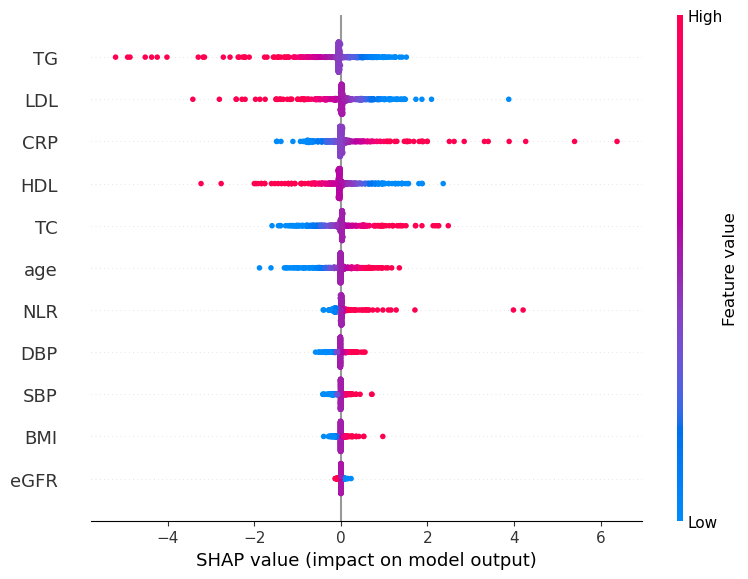

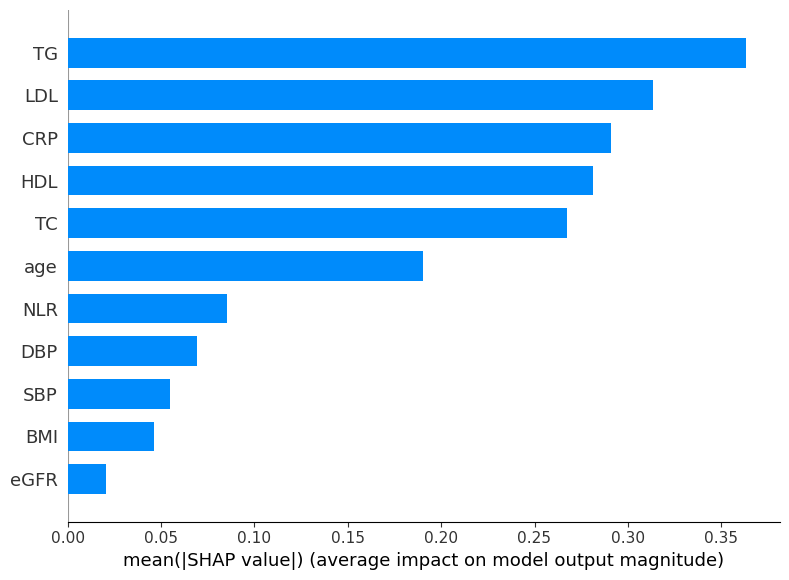

In [1]:
# 1. 라이브러리 불러오기
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. 데이터 불러오기
df = pd.read_excel("CACS_dataset_with_binary.xlsx")

# 3. 분석에 사용할 변수 선택
drop_cols = ['id', 'name', 'sex', 'birth', 'CACS']
X = df.drop(columns=drop_cols + ['CACS_binary'])
y = df["CACS_binary"]

# 4. 결측치 제거 (또는 이전 단계에서 이미 처리되었다면 생략)
X = X.dropna()
y = y.loc[X.index]

# 5. 데이터 분할 및 표준화
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7. SHAP 값 계산
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

# 8. SHAP 요약 plot (beeswarm)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 9. SHAP 요약 plot (bar)
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
